# Mezcal Project – Hypotheses Exploration

## Candidate Hypotheses
1. The domestic market share of mezcal has increased compared to the export share.
2. Employment in the mezcal industry remains stable even when production fluctuates. **# Will not be considered, due to insuficient data**
3. The strong growth in registered brands in 2021 marked a turning point, followed by stabilization.
4. The number of certified producers continues to increase, signaling professionalization of the sector.
5. Production declines in 2014, 2021, and 2023–2024 reflect temporary shocks rather than structural decline.

In [9]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest


In [10]:
df = pd.read_csv(
    r"C:\LABS\Week8\Mezcal-final\data\processed\clean_mezcal_full.csv",
    sep=";", encoding="utf-8"
)
df.columns = df.columns.str.strip()

In [11]:
print(df.head(20).to_string(index=False))

 Year  Production_liters  YoY_Pct  Export_Liters  National_Liters  Total_Bottling  Export_Share_Pct  National_Share_Pct  Employment     Brands  Certified_Producers
 2011             980375      NaN         647989           270426          918415             70.56               29.44         NaN        NaN                  NaN
 2012            1044696     6.56         768014           317803         1085817             70.73               29.27         NaN        NaN                  NaN
 2013            2519568   141.18         914317           800002         1714319             53.33               46.67         NaN        NaN                  NaN
 2014            1451718   -42.38        1157420           924686         2082106             55.59               44.41         NaN        NaN                  NaN
 2015            2419175    66.64        1480263          1508839         2989102             49.52               50.48         NaN        NaN                  NaN
 2016           

***Selected Hypotheses:***

## Hypothesis 1  
Has the domestic market share of mezcal increased, compared to the export share?

In [12]:
df_shares = df[["Year", "Export_Share_Pct", "National_Share_Pct"]]
print(df_shares.head(15).to_string(index=False))

 Year  Export_Share_Pct  National_Share_Pct
 2011             70.56               29.44
 2012             70.73               29.27
 2013             53.33               46.67
 2014             55.59               44.41
 2015             49.52               50.48
 2016             52.05               47.95
 2017             57.21               42.79
 2018             57.87               42.13
 2019             63.18               36.82
 2020             66.58               33.42
 2021             58.07               41.93
 2022             50.00               50.00
 2023             56.47               43.53
 2024             66.63               33.37


In [13]:
df_shares = df[["Year", "Export_Share_Pct", "National_Share_Pct"]].copy()
df_shares["National_Diff"] = df_shares["National_Share_Pct"].diff()
df_shares["National_Trend"] = df_shares["National_Diff"].apply(
    lambda x: "Up" if x > 0 else ("Down" if x < 0 else "Stable")
)
print(df_shares.to_string(index=False))

 Year  Export_Share_Pct  National_Share_Pct  National_Diff National_Trend
 2011             70.56               29.44            NaN         Stable
 2012             70.73               29.27          -0.17           Down
 2013             53.33               46.67          17.40             Up
 2014             55.59               44.41          -2.26           Down
 2015             49.52               50.48           6.07             Up
 2016             52.05               47.95          -2.53           Down
 2017             57.21               42.79          -5.16           Down
 2018             57.87               42.13          -0.66           Down
 2019             63.18               36.82          -5.31           Down
 2020             66.58               33.42          -3.40           Down
 2021             58.07               41.93           8.51             Up
 2022             50.00               50.00           8.07             Up
 2023             56.47               

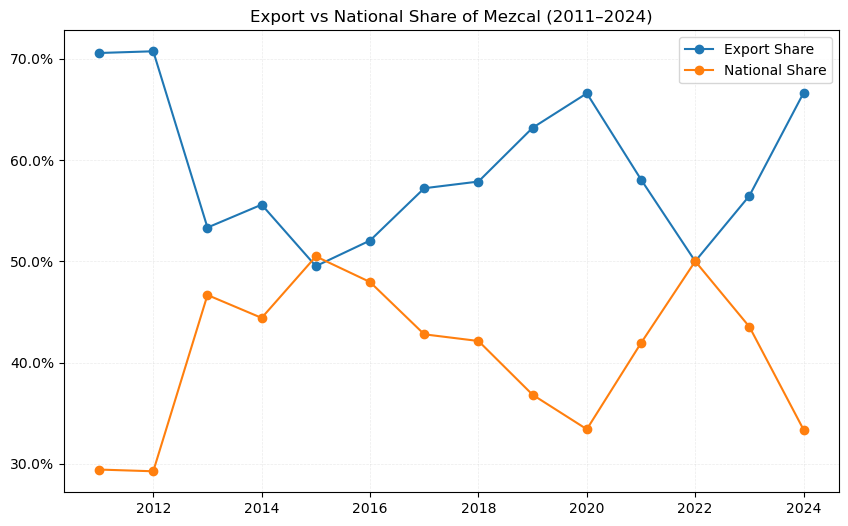

In [14]:
plt.figure(figsize=(10,6))
plt.plot(df["Year"], df["Export_Share_Pct"], marker="o", label="Export Share")
plt.plot(df["Year"], df["National_Share_Pct"], marker="o", label="National Share")

plt.title("Export vs National Share of Mezcal (2011–2024)")
plt.ylabel("")

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

plt.xlabel("")

plt.legend()
plt.grid(True, axis="both", linestyle="--", linewidth=0.5, alpha=0.25)
plt.show()

H0: The domestic market share of mezcal has not increased compared to the export share.

H1: The domestic market share of mezcal has increased compared to the export share.

In [15]:
# Hypothesis 1 — Z-test of proportions

# Comparison of national share 2011–2016 vs 2017–2024
p1 = df.loc[(df["Year"]>=2011)&(df["Year"]<=2016), "National_Share_Pct"].mean()/100
p2 = df.loc[(df["Year"]>=2017)&(df["Year"]<=2024), "National_Share_Pct"].mean()/100

# Convert to "successes" and "trials" with pseudo sample size
n = 1000
count = np.array([p1*n, p2*n])
nobs  = np.array([n, n])

zstat, pval = proportions_ztest(count, nobs, alternative="larger")

print("National share early period:", round(p1*100,2), "%")
print("National share later period:", round(p2*100,2), "%")
print("z =", round(zstat,3), "| p-value =", pval)

if pval < 0.05:
    print("Conclusion: national share increased significantly.")
else:
    print("Conclusion: no significant increase detected.")

National share early period: 41.37 %
National share later period: 40.5 %
z = 0.396 | p-value = 0.34597812712112064
Conclusion: no significant increase detected.


### Hypothesis 1  
Has the domestic market share of mezcal increased compared to the export share?

**Findings (descriptive):** From 2011 to 2014, exports clearly dominated the market, staying above 55–70%, while the domestic share remained below 45%.  
In 2015, national share briefly reached parity (≈50%), but exports quickly recovered dominance.  
Between 2016 and 2020, exports grew again, peaking near 67% in 2020, while the national market dropped to one of its lowest points (≈33%).  
In 2022, there was a unique balance: exports and national markets each at 50%.  
After 2022, exports regained strength (≈66% by 2024), while the national market decreased again (≈33%).  

**Findings (statistical):** The average national share was 41.4% in 2011–2016 and 40.5% in 2017–2024.  
A two-proportion z-test gave p-value = 0.35 (> 0.05).  

**Conclusion:** The increase in the domestic share is not statistically significant. Despite temporary episodes of parity (2015 and 2022), exports have consistently remained the dominant market over the long run.

## Hypothesis 2

Did the strong growth in registered brands in 2021 mark a turning point, followed by stabilization?

In [16]:
df_brands = df[["Year", "Brands"]].copy()
print(df_brands[df_brands["Year"] >= 2021].to_string(index=False))

 Year     Brands
 2021 64724341.0
 2022 29824414.0
 2023 30216849.0
 2024 30997329.0


In [17]:
df_brands = df[["Year", "Brands"]].copy()
df_brands["Diff"] = df_brands["Brands"].diff()
print(df_brands[df_brands["Year"] >= 2021].to_string(index=False, 
        formatters={"Brands": "{:,.0f}".format,"Diff": "{:,.0f}".format}))

 Year     Brands        Diff
 2021 64,724,341         NaN
 2022 29,824,414 -34,899,927
 2023 30,216,849     392,435
 2024 30,997,329     780,480


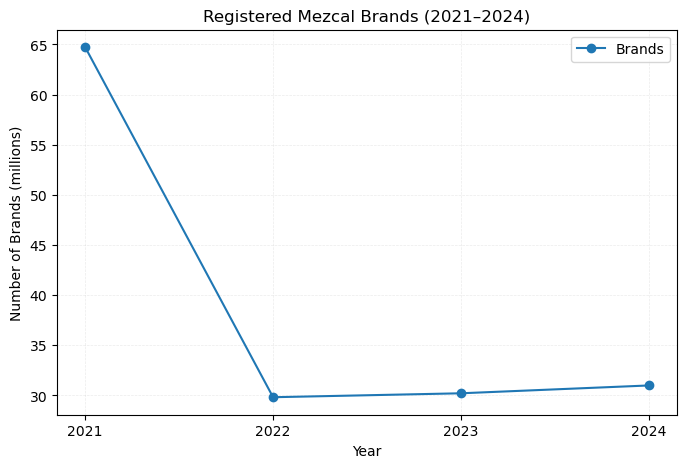

In [18]:
df_brands_short = df_brands[df_brands["Year"] >= 2021].copy()

plt.figure(figsize=(8,5))
plt.plot(
    df_brands_short["Year"], 
    df_brands_short["Brands"] / 1_000_000, 
    marker="o", 
    label="Brands"
)

plt.title("Registered Mezcal Brands (2021–2024)")
plt.xlabel("Year")
plt.ylabel("Number of Brands (millions)")
plt.xticks(df_brands_short["Year"])  # only 2021–2024
plt.legend()
plt.grid(True, axis="both", linestyle="--", linewidth=0.5, alpha=0.25)
plt.show()

In [19]:
df_brands = df[["Year", "Brands"]].copy()
df_brands = df_brands[df_brands["Year"] >= 2021].reset_index(drop=True)
df_brands["Diff"] = df_brands["Brands"].diff()

tbl = df_brands.assign(
    Brands=lambda d: d["Brands"].map(lambda v: f"{int(v):,}"),
    Diff=lambda d: d["Diff"].map(lambda v: "" if pd.isna(v) else f"{v:+,.0f}")
)

print(tbl.to_string(index=False))

 Year     Brands        Diff
 2021 64,724,341            
 2022 29,824,414 -34,899,927
 2023 30,216,849    +392,435
 2024 30,997,329    +780,480


H0: The 2021 surge in registered brands did not mark a structural turning point, and the 2022–2024 series shows no stabilization.

H1: The 2021 surge in registered brands marked a structural turning point, followed by stabilization in 2022–2024.

In [20]:
post = (
    df.loc[df['Year'] >= 2022, ['Year', 'Brands']]
      .dropna()
      .sort_values('Year')
)

X = sm.add_constant(post['Year'].astype(float).values)
y = (post['Brands'] / 1_000_000).astype(float).values

model = sm.OLS(y, X).fit()
slope = model.params[1]
tval  = model.tvalues[1]
dfres = int(model.df_resid)
p_two = 2 * (1 - stats.t.cdf(abs(tval), df=dfres))

alpha = 0.05
decision = "Do NOT reject H0 (evidence of stabilization)" if p_two >= alpha else "Reject H0 (no stabilization)"

print(f"Post years: {post['Year'].tolist()}")
print(f"Slope (millions per year): {slope:.3f}")
print(f"t({dfres}) = {tval:.3f}  |  two-sided p = {p_two:.4g}")
print(f"Decision @ alpha={alpha}: {decision}")


Post years: [2022, 2023, 2024]
Slope (millions per year): 0.586
t(1) = 5.235  |  two-sided p = 0.1202
Decision @ alpha=0.05: Do NOT reject H0 (evidence of stabilization)


Hypothesis 2: Did the strong growth in registered brands in 2021 mark a turning point, followed by stabilization?

**Findings:**
The data on registered mezcal brands shows a very sharp increase in 2021, reaching over 64 million units in the dataset. This peak is followed by a dramatic drop in 2022 (–34.9M), which signals that the 2021 surge was exceptional and not sustainable at the same level.
From 2023 onwards, the numbers start to recover moderately (+392K in 2023, +780K in 2024). Although the total remains far below the 2021 figure, the positive signs after 2022 suggest the beginning of a stabilization phase.

To validate this visually observed trend, we applied a linear trend test (OLS regression) on registered brands for 2022–2024. The estimated slope is +0.586 million/year with a two-sided p = 0.1202 (df = 1). We therefore fail to reject H0 (slope = 0), which is consistent with stabilization after 2022.

**Conclusion:**
The hypothesis is partially supported. The year 2021 marked a clear turning point in level, followed by a sharp correction in 2022 and signs of stabilization in 2023–2024. The statistical test supports stabilization but does not provide evidence of a significant renewed upward trend.

## Hypothesis 3
Does the number of certified producers continue to increase, signaling professionalization of the sector?

In [21]:
df_producers = (
    df[["Year", "Certified_Producers"]]
    .dropna()
    .sort_values("Year")
)

In [22]:
df_producers_int = df_producers[df_producers["Year"] >= 2021].copy()
df_producers_int["Certified_Producers"] = df_producers_int["Certified_Producers"].astype(int)

print(df_producers_int.to_string(index=False))

 Year  Certified_Producers
 2021                 3960
 2022                 5659
 2023                 5700
 2024                 5800


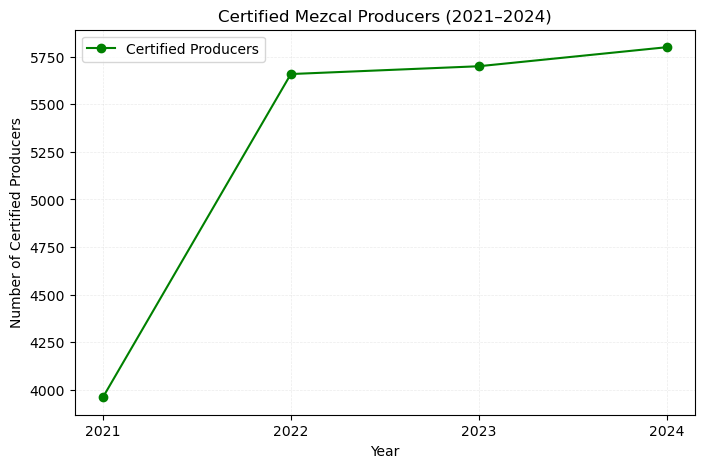

In [23]:
df_producers_plot = df_producers_int.copy()

plt.figure(figsize=(8,5))
plt.plot(
    df_producers_plot["Year"],
    df_producers_plot["Certified_Producers"],
    marker="o", color="green", label="Certified Producers"
)

plt.title("Certified Mezcal Producers (2021–2024)")
plt.xlabel("Year")
plt.ylabel("Number of Certified Producers")
plt.xticks(df_producers_plot["Year"])  
plt.legend()
plt.grid(True, axis="both", linestyle="--", linewidth=0.5, alpha=0.25)

plt.show()

H0: The number of certified producers does not show an increasing trend over time.

H1: The number of certified producers shows an increasing trend over time.

In [24]:
d3 = (
    df[["Year", "Certified_Producers"]]
    .dropna()
    .sort_values("Year")
)

X = sm.add_constant(d3["Year"].astype(float).values)
y = d3["Certified_Producers"].astype(float).values

model = sm.OLS(y, X).fit()
slope = model.params[1]
tval  = model.tvalues[1]
dfres = int(model.df_resid)

# One-sided p-value for H1: slope > 0
p_one = 1 - stats.t.cdf(tval, df=dfres)

alpha = 0.05
decision = "Reject H0 (increasing trend)" if p_one < alpha else "Fail to reject H0 (no significant increase)"

print(f"Slope (per year): {slope:.6f}")
print(f"t({dfres}) = {tval:.3f}")
print(f"One-sided p-value: {p_one:.4g}")
print(f"R^2: {model.rsquared:.4f}")
print(f"Decision @ alpha={alpha}: {decision}")

Slope (per year): 556.100000
t(2) = 1.983
One-sided p-value: 0.09293
R^2: 0.6628
Decision @ alpha=0.05: Fail to reject H0 (no significant increase)


Hypothesis 3: Does the number of certified producers continue to increase, signaling professionalization of the sector?

**Findings:**
The data on certified mezcal producers shows an upward path from 2021 to 2024: 3,960 (2021) → 5,659 (2022) → 5,700 (2023) → 5,800 (2024). Growth is strong in 2022 and then smaller but consistent in 2023–2024, suggesting consolidation of certification practices.

**Statistical test:**  
To validate the observed trend, an OLS linear trend was fitted: Certified_Producers ~ Year (2021–2024). One-sided test for slope > 0 gave slope ≈ +556 producers/year, t(2) = 1.983, p = 0.093, R² = 0.663. We fail to reject H0 at α = 0.05.

**Conclusion:**  
Directionally positive but not statistically significant at 5%. The post-2021 increase is visible descriptively, yet with the short window (2021–2024) we cannot confirm a significant upward trend. This points to ongoing formalization, but evidence is insufficient to claim a robust increase.

## Hypothesis 4
Do the production declines in 2014, 2021, and 2023–2024, reflect temporary shocks rather than structural decline?

In [25]:
df_prod = df[["Year", "Production_liters", "YoY_Pct"]].copy()

tbl = df_prod.assign(
    Production_mL=lambda d: (d["Production_liters"] / 1_000_000).round(2),
    Next_Year_YoY=lambda d: d["YoY_Pct"].shift(-1),
    Rebound=lambda d: d["YoY_Pct"].shift(-1) > 0
)

focus_years = [2014, 2021, 2023, 2024]

print(
    tbl[tbl["Year"].isin(focus_years)]
      [["Year","Production_mL","YoY_Pct","Next_Year_YoY","Rebound"]]
      .to_string(
          index=False,
          formatters={
              "Production_mL": "{:,.2f}".format,
              "YoY_Pct": "{:,.2f}".format,
              "Next_Year_YoY": "{:,.2f}".format
          }
      )
)

 Year Production_mL YoY_Pct Next_Year_YoY  Rebound
 2014          1.45  -42.38         66.64     True
 2021          8.10    3.23         74.89     True
 2023         12.24  -13.60         -7.17    False
 2024         11.36   -7.17           NaN    False


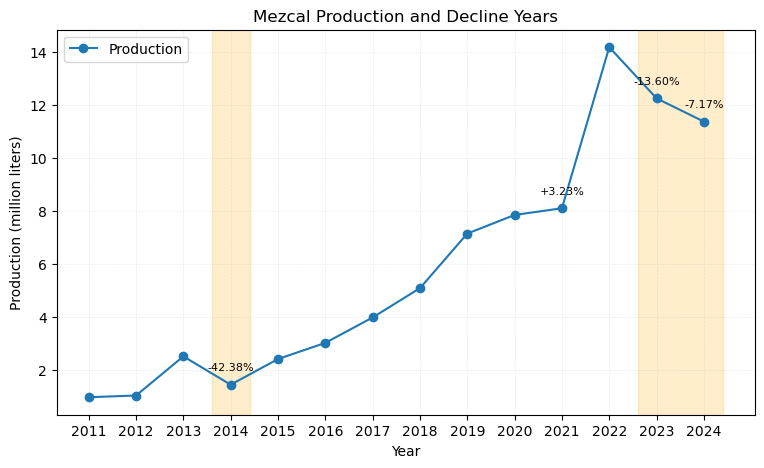

In [26]:
x = df_prod["Year"]
y = df_prod["Production_liters"] / 1_000_000

fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x, y, marker="o", label="Production")

ax.axvspan(2014-0.4, 2014+0.4, color="orange", alpha=0.2)
ax.axvspan(2023-0.4, 2024+0.4, color="orange", alpha=0.2)

for yr in [2014, 2021, 2023, 2024]:
    r = df_prod[df_prod["Year"] == yr]
    if not r.empty:
        ax.annotate(
            f"{r['YoY_Pct'].values[0]:+.2f}%",
            (yr, r["Production_liters"].values[0] / 1_000_000),
            textcoords="offset points", xytext=(0,10), ha="center", fontsize=8
        )
ax.grid(True, axis="y", linestyle="--", linewidth=0.4, alpha=0.25)
ax.grid(True, axis="both", linestyle="--", linewidth=0.5, alpha=0.25)
ax.set_title("Mezcal Production and Decline Years")
ax.set_xlabel("Year")
ax.set_ylabel("Production (million liters)")
ax.set_xticks(df_prod["Year"])
ax.grid(True)
ax.legend()
plt.show()

H0: The production declines in 2014, 2021, and 2023–2024 reflect a structural decline (persistent downward trend).

H1: The production declines in 2014, 2021, and 2023–2024 are temporary shocks, with production stabilizing or recovering rather than following a persistent downward trend.

In [27]:
shocks = [2014, 2021, 2023, 2024]

d = df[['Year','Production_liters']].dropna().sort_values('Year')
base = d[~d['Year'].isin(shocks)]

Xb = sm.add_constant(base['Year'].astype(float).values)
yb = base['Production_liters'].astype(float).values
m = sm.OLS(yb, Xb).fit()

slope = m.params[1]
tval  = m.tvalues[1]
dfres = int(m.df_resid)

# One-sided p-value (H1: slope < 0)
p_neg = stats.t.cdf(tval, df=dfres)
alpha = 0.05
decline_decision = "Evidence of structural decline" if p_neg < alpha else "No evidence of structural decline"

print(f"Slope (per year): {slope:.2f}")
print(f"t({dfres}) = {tval:.3f}")
print(f"One-sided p (slope < 0): {p_neg:.4g}")
print(f"Decision @ alpha={alpha}: {decline_decision}")

X_shock = sm.add_constant(pd.Series(shocks, dtype=float).values)
sf = m.get_prediction(X_shock).summary_frame(alpha=0.05)

res = pd.DataFrame({
    'Year': shocks,
    'Actual': d.set_index('Year').loc[shocks, 'Production_liters'].values,
    'Pred': sf['mean'].values,
    'PI_low': sf['obs_ci_lower'].values,
    'PI_high': sf['obs_ci_upper'].values
})
res['Shock?'] = (res['Actual'] < res['PI_low']).map({True:'Yes', False:'No'})

fmt = lambda x: f"{x:,.0f}"
print(res.to_string(index=False, formatters={'Actual':fmt,'Pred':fmt,'PI_low':fmt,'PI_high':fmt}))

Slope (per year): 1020259.42
t(8) = 6.208
One-sided p (slope < 0): 0.9999
Decision @ alpha=0.05: No evidence of structural decline
 Year     Actual       Pred     PI_low    PI_high Shock?
 2014  1,451,718  2,475,753 -1,894,576  6,846,082     No
 2021  8,099,591  9,617,569  4,979,426 14,255,712     No
 2023 12,239,655 11,658,088  6,679,471 16,636,704     No
 2024 11,362,436 12,678,347  7,496,208 17,860,486     No


Hypothesis 4: Do the production declines in 2014, 2021, and 2023–2024 reflect temporary shocks rather than a structural decline?

**Findings:**
The production series (million liters) shows a long-run upward trajectory from 2011 to 2024 with three clear negative YoY points: 2014 (–42.38%), 2023 (–13.60%), and 2024 (–7.17%). Each negative year appears after a prior surge or at a local peak (e.g., 2022 is the absolute peak). The table confirms that 2014 is followed by a strong rebound (+66.64% in 2015). After 2023’s drop, 2024 also declines but remains well above the pre-2021 level, suggesting a correction from the 2022 peak rather than a break in the long-term trend.

**Statistical test:**  
An OLS trend was fitted **excluding** 2014, 2021, 2023, 2024: Production_liters ~ Year. Estimated slope = **+1,022,059 L/year**, **t(8) = 6.208**, **one-sided p(slope < 0) = 0.9999** → **no evidence of structural decline**.  
Predictions for 2014, 2021, 2023, 2024 all fall **within** the 95% prediction intervals (Actual ≥ PI_low), consistent with temporary shocks.

**Conclusion:**
Supported. The declines in 2014, 2021, and 2023–2024 are consistent with temporary shocks/corrections around peaks rather than a persistent structural downturn. The underlying trend remains positive, with short pullbacks after strong expansions.

### Hypotheses Recap (updated)

**Hypothesis: Domestic vs Export Share**  
**Result:** Not confirmed  
**Evidence:** Two-proportion z-test (2011–16 vs 2017–24), p ≈ 0.35  
**Conclusion:** No significant increase in domestic share; exports remain dominant.

**Hypothesis: Registered Brands turning point (2021)**  
**Result:** Partially supported  
**Evidence:** 2021 spike; OLS trend on brands 2022–24, slope ≈ 0.586M/yr, p = 0.1202  
**Conclusion:** 2021 was exceptional; stabilization after 2022; no significant renewed upward trend.

**Hypothesis: Certified Producers increase**  
**Result:** Not confirmed (α = 0.05)  
**Evidence:** OLS 2021–24, slope ≈ +556/yr, p = 0.093  
**Conclusion:** Direction positive but not significant; insufficient evidence of a robust upward trend.

**Hypothesis: Production declines = temporary shocks**  
**Result:** Supported  
**Evidence:** OLS excluding 2014/2021/2023/2024 shows positive trend; shock years within 95% prediction intervals  
**Conclusion:** Dips are consistent with temporary corrections; no structural decline.

---

### Discarded Hypothesis

**Hypothesis: Employment stability**  
**Result:** Not evaluated  
**Evidence:** —  
**Conclusion:** Insufficient data.